In [1]:
# for broader display in the browser:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Kaka\AppData\Local\Temp\ipykernel_10040\2471477764.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Imports

In [2]:
# Matplotlib
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.marker'] = ','
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['figure.figsize'] = [12.0, 12.0]
mpl.rcParams['savefig.transparent'] = False
mpl.rcParams['savefig.facecolor'] = 'w'
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['legend.markerscale']=1.5
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['legend.title_fontsize']=20

# , NumPy & pandas
import numpy as np
import pandas as pd

In [3]:
SAVE_DIR = "" 
CLRS = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

In [4]:
DET='ORCA1' 

In [5]:
file=pd.read_csv('digitized_zenith_plot_info.csv',sep=';')
file['CORSIKA_err']=file['CORSIKA_err']-file['CORSIKA']
file['data_err']=file['data']*0.01
file['MUPAGE_err']=file['MUPAGE']*0.01

In [6]:
file

x      data    MUPAGE   CORSIKA  CORSIKA_err  Unnamed: 5  Unnamed: 6  \
0 -0.9  0.003509  0.004235  0.001867     0.000780         NaN         NaN   
1 -0.7  0.014369  0.014960  0.008512     0.002327         NaN         NaN   
2 -0.5  0.025254  0.025595  0.013618     0.006483         NaN         NaN   
3 -0.3  0.029273  0.031306  0.027373     0.007954         NaN         NaN   
4 -0.1  0.029669  0.034391  0.013802     0.003079         NaN         NaN   
5  0.1  0.038290  0.045592  0.023934     0.003809         NaN         NaN   
6  0.3  0.076966  0.092882  0.050762     0.008079         NaN         NaN   
7  0.5  0.237735  0.250852  0.261162     0.058266         NaN         NaN   
8  0.7  0.600379  0.561398  0.471487     0.067749         NaN         NaN   
9  0.9  0.935073  0.828643  1.000000     0.206793         NaN         NaN   

   data_err  MUPAGE_err  
0  0.000035    0.000042  
1  0.000144    0.000150  
2  0.000253    0.000256  
3  0.000293    0.000313  
4  0.000297    0.000344  
5  0.000383    0.000456  
6  0.000770    0.000929  
7  0.002377    0.002509  
8  0.006004    0.005614  
9  0.009351    0.008286

C:\Users\Kaka\AppData\Local\Temp\ipykernel_10040\4143641499.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "," (-> marker=','). The keyword argument will take precedence.
  ax1.errorbar(file['x'],file['data'],xerr=0.1,yerr=file['data']*0.01,c='k',label='data',fmt=',',marker='o',markersize=MS)
C:\Users\Kaka\AppData\Local\Temp\ipykernel_10040\4143641499.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "," (-> marker=','). The keyword argument will take precedence.
  ax1.errorbar(file['x'],file['MUPAGE'],xerr=0.1,yerr=0,c='tab:orange',label='MUPAGE',fmt=',',marker='d',markersize=MS)
C:\Users\Kaka\AppData\Local\Temp\ipykernel_10040\4143641499.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "," (-> marker=','). The keyword argument will take precedence.
  ax1.errorbar(file['x'],file['CORSIKA'],xerr=0.1,yerr=file['CORSIKA_err'],c='t

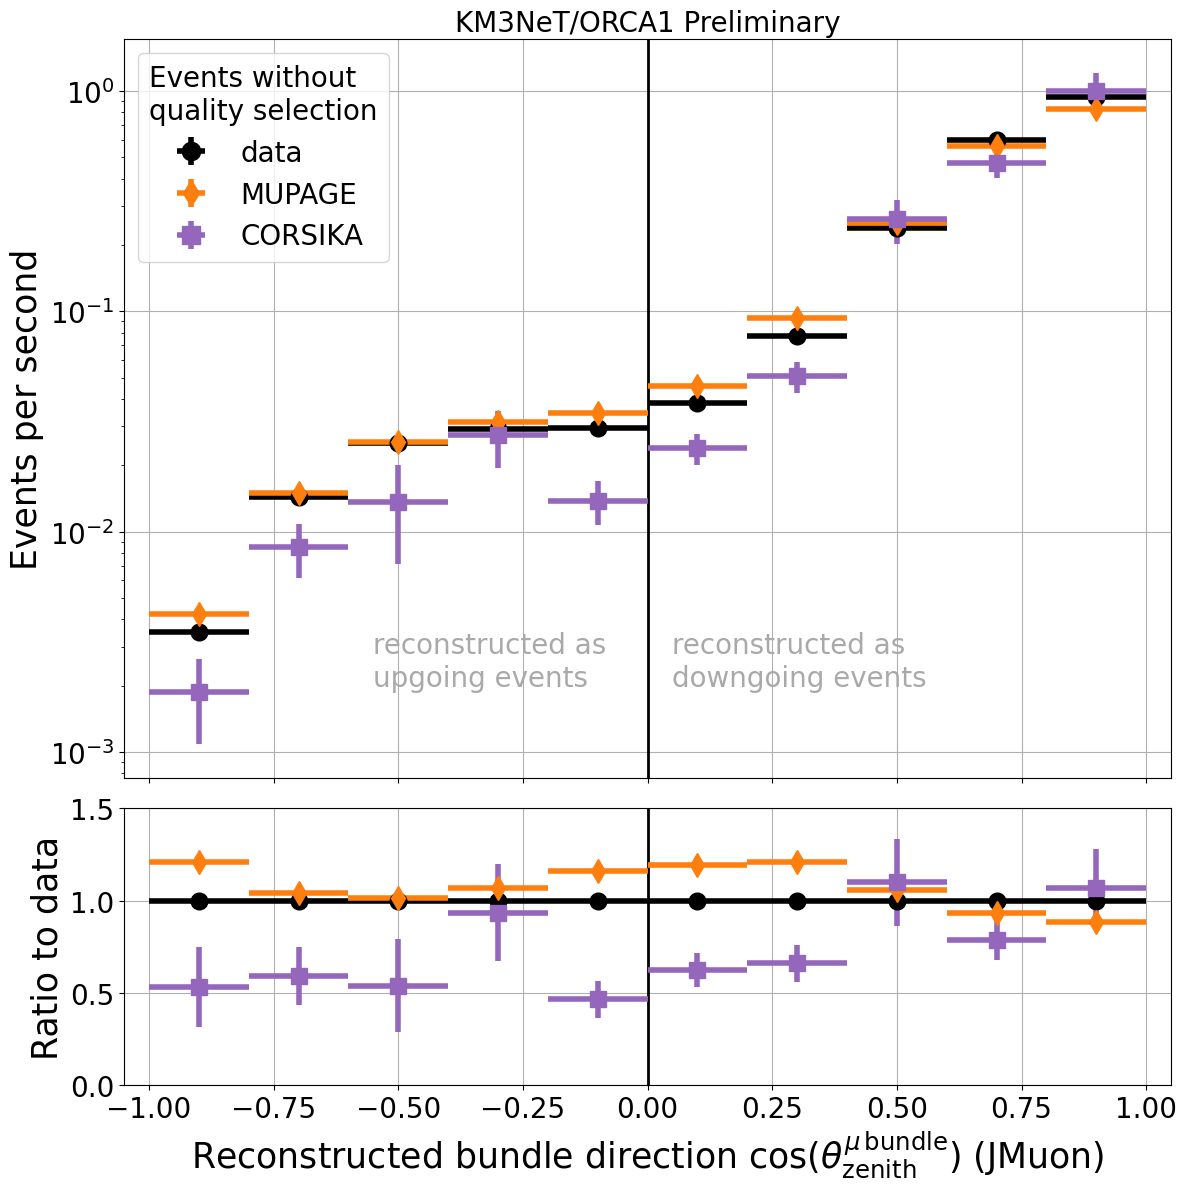

In [8]:
gs = gridspec.GridSpec(2, 1, height_ratios=[8,3])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
MS=12
LW=3

ax1.grid()
ax2.grid()
ax1.axvline(0,c='k',lw=2)
ax2.axvline(0,c='k',lw=2)
ax1.annotate(xy=(-0.55,2e-3),text='reconstructed as\nupgoing events',color='darkgray',fontsize=20)
ax1.annotate(xy=(0.05,2e-3),text='reconstructed as\ndowngoing events',color='darkgray',fontsize=20)


ax1.errorbar(file['x'],file['data'],xerr=0.1,yerr=file['data']*0.01,c='k',label='data',fmt=',',marker='o',markersize=MS)
ax1.errorbar(file['x'],file['MUPAGE'],xerr=0.1,yerr=0,c='tab:orange',label='MUPAGE',fmt=',',marker='d',markersize=MS)
ax1.errorbar(file['x'],file['CORSIKA'],xerr=0.1,yerr=file['CORSIKA_err'],c='tab:purple',label='CORSIKA',fmt=',',marker='s',markersize=MS)

# ax2.axhline(1,c='k',ls='--')
ax2.errorbar(file['x'],np.divide(file['data'],file['data']),xerr=0.1,yerr=0,c='k',label='data',fmt=',',marker='o',markersize=MS)
ax2.errorbar(file['x'],np.divide(file['MUPAGE'],file['data']),xerr=0.1,yerr=0,c='tab:orange',label='MUPAGE',fmt=',',marker='d',markersize=MS)
ratioerr=np.divide(file['CORSIKA_err'],file['data'])-np.divide(file['CORSIKA'],np.square(file['data']))*file['data_err']
ax2.errorbar(file['x'],np.divide(file['CORSIKA'],file['data']),xerr=0.1,yerr=ratioerr,c='tab:purple',label='CORSIKA',fmt=',',marker='s',markersize=MS)

ax1.set_yscale('log')
ax1.set_title('KM3NeT/ORCA1 Preliminary')
ax1.set_ylabel('Events per second')
# ax1.set_xticks(ticks=[],major=False, minor=False)
ax1.tick_params(labelbottom=False)
ax2.set_xlabel('Reconstructed bundle direction $\cos(\\theta_{\mathrm{zenith}}^{\mu \, \mathsf{bundle}})$ (JMuon)')
ax2.set_ylabel('Ratio to data')
ax1.set_xlim(-1.05,1.05)
ax2.set_xlim(-1.05,1.05)
ax2.set_ylim(0.,1.5)
ax1.legend(title='Events without\nquality selection',markerscale=1.1)
plt.tight_layout()
plt.savefig(SAVE_DIR+'ORCA1_zenith.pdf')